In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from  tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [4]:
df = pd.read_csv('../data/train.csv', index_col=0, na_values='?')
test = pd.read_csv('../data/test.csv', index_col=0, na_values='?')



In [5]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
id,,,,,,,,,
981,22.798447,4,140,148.0,2835,13.477573,82,1,datsun 200-sx
983,35.173640,4,97,67.0,2234,17.542681,80,3,plymouth valiant
994,17.825448,8,302,220.0,2774,15.177189,76,1,triumph tr7 coupe
995,28.545147,4,97,150.0,2130,13.324669,70,1,datsun pl510
997,36.011880,4,97,150.0,2300,15.364361,71,1,chevrolet nova


In [6]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      9
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
origin = df.pop('origin')

In [9]:
df['USA'] = (origin==1)*1.0
df['Europe'] = (origin==2)*1.0
df['Japan'] = (origin==3)*1.0

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [10]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,USA,Europe,Japan
id,,,,,,,,,,,
981,22.798447,4,140,148.0,2835,13.477573,82,datsun 200-sx,1.0,0.0,0.0
983,35.173640,4,97,67.0,2234,17.542681,80,plymouth valiant,0.0,0.0,1.0
994,17.825448,8,302,220.0,2774,15.177189,76,triumph tr7 coupe,1.0,0.0,0.0
995,28.545147,4,97,150.0,2130,13.324669,70,datsun pl510,1.0,0.0,0.0
997,36.011880,4,97,150.0,2300,15.364361,71,chevrolet nova,1.0,0.0,0.0


In [11]:
train_data, test_data = train_test_split(df, test_size=0.2)

In [13]:
train_data.shape

(392, 11)

In [14]:
test_data.shape

(99, 11)

In [15]:
df.shape

(491, 11)

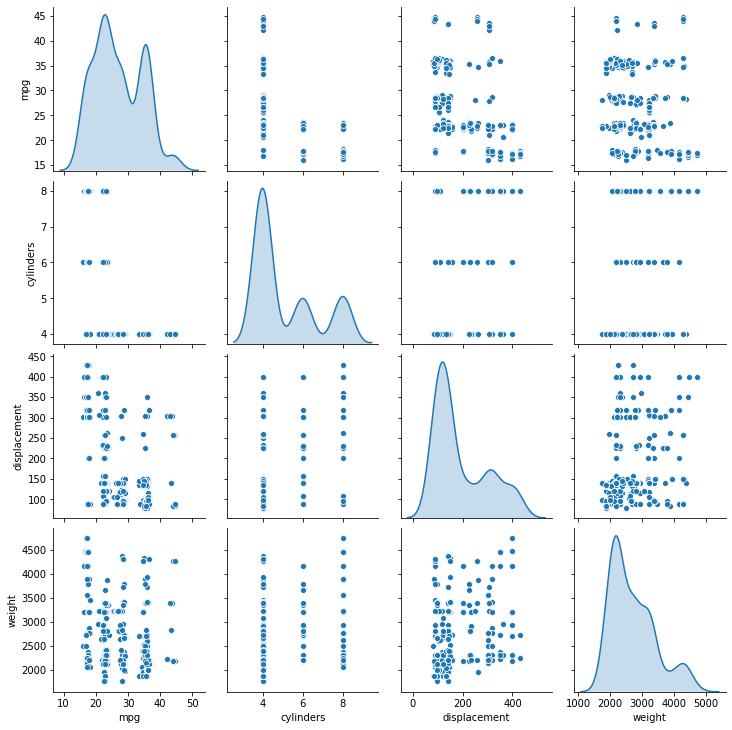

In [16]:
sns.pairplot(train_data[['mpg','cylinders','displacement','weight']], diag_kind='kde')

In [17]:
train_stats = train_data.describe()
train_stats.pop("mpg")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,392.0,5.132653,1.587275,4.000000,4.000000,4.000000,6.000000,8.000000
displacement,392.0,192.377551,105.823940,80.000000,105.000000,140.000000,302.000000,429.000000
horsepower,392.0,106.737245,35.586570,54.000000,85.000000,97.000000,130.500000,220.000000
weight,392.0,2719.683673,699.865794,1760.000000,2190.000000,2615.000000,3193.000000,4732.000000
acceleration,392.0,15.299311,2.250942,9.530859,13.450953,15.233183,17.176278,21.922511
model year,392.0,76.293367,3.920326,70.000000,73.000000,76.000000,80.000000,82.000000
USA,392.0,0.737245,0.440693,0.000000,0.000000,1.000000,1.000000,1.000000
Europe,392.0,0.089286,0.285520,0.000000,0.000000,0.000000,0.000000,1.000000
Japan,392.0,0.173469,0.379136,0.000000,0.000000,0.000000,0.000000,1.000000
